# Study on The Insights Data Set


`Imports`


In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [5]:
df = pd.read_csv("Insights.csv")
df=df.replace(np.NaN,-1)
print(df.columns.values.tolist())

['Date', 'HS Code', 'Product', 'Specific Product', 'Port of Origin', 'Country of Destination', 'Port of Destination', 'Value(USD)(CP)', 'Std Qty', 'Std Unit', 'Std Unit Price(USD)(SP)', 'Qty', 'Unit', 'Value In FC(Cost)', 'Unit Rate In FC', 'Unit Rate Currency', 'Value(INR)', 'Shipment Mode', 'Invoice Value INR', 'Exachange Rate', 'Unit Rate in Rs', 'Profit in Rs', 'Profit %']


In [16]:
quantity = np.array(df['Qty']).reshape((-1, 1))
unit_rate_in_fc = np.array(df['Unit Rate In FC']).reshape((-1, 1))

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(quantity,unit_rate_in_fc,test_size = 1, random_state = 0 ) 

In [38]:
model = LinearRegression()

In [39]:
model.fit(X_train,Y_train )

LinearRegression()

In [40]:
 r_sq = model.score(X_train,Y_train)

In [41]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0016259939058975714


In [42]:
print('intercept:', model.intercept_)

intercept: [21.73436105]


In [43]:
 print('slope:', model.coef_)

slope: [[-0.00031228]]


In [44]:

y_predict=model.predict(Y_test)

## The Neg Mean Square value is Important which is the below cell



In [45]:
np.sqrt(mean_squared_error(X_test,Y_test))

87.05

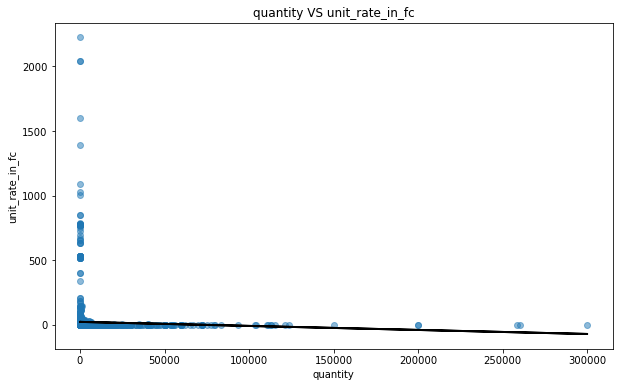

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(quantity,unit_rate_in_fc,alpha=0.5)
plt.plot(X_train,model.predict(X_train), color='black',linewidth=2)
plt.title("quantity VS unit_rate_in_fc")
plt.xlabel("quantity")
plt.ylabel("unit_rate_in_fc")
plt.show()

### as we can see from the above linear regression model the points are away from the diagonal and the diagonal is moving downwards hence we need to use 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [36]:
ridge = Ridge(alpha=1.0)

In [37]:
ridge.fit(quantity,unit_rate_in_fc)

Ridge()

In [38]:
y_ridge_predict=ridge.predict(quantity)

In [39]:
np.sqrt(mean_squared_error(unit_rate_in_fc,y_ridge_predict))

89.90017849654832

NameError: name 'ridge' is not defined

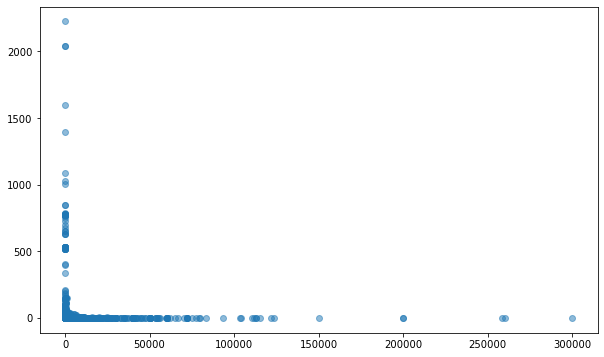

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(quantity,unit_rate_in_fc,alpha=0.5)
plt.plot(quantity,ridge.predict(quantity), color='black',linewidth=2)
plt.title("quantity VS unit_rate_in_fc")
plt.xlabel("quantity")
plt.ylabel("unit_rate_in_fc")
plt.ylim(0,50)
plt.show()

In [14]:
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(quantity,unit_rate_in_fc)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [18]:

print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 1e-15}
-8146.236607502136


In [19]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(quantity, unit_rate_in_fc, test_size=0.3, random_state=0)

In [21]:
prediction_ridge=ridge_regression.predict(X_test)

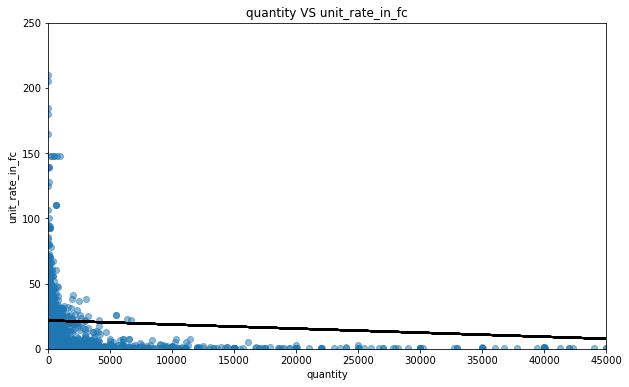

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(quantity,unit_rate_in_fc,alpha=0.5)
plt.plot(X_test,ridge_regression.predict(X_test), color='black',linewidth=2)
plt.title("quantity VS unit_rate_in_fc")
plt.xlabel("quantity")
plt.ylabel("unit_rate_in_fc")
plt.ylim(0,250)
plt.xlim(0,45000)
plt.show()